In [8]:
# https://twitter.com/aigonewrong/status/1335377716728586244

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def doit(symbol,window=125,lookback=-252*6):
    tick = yf.Ticker(symbol)
    history = tick.history(period="max")

    df=pd.DataFrame()
    df['price'] = history.Close
    df['volume'] = history.Volume
    df['pct_chg'] = df.price.pct_change()
    # log return computation
    df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))
    df['ret_mean'] = df.log_ret.rolling(window).mean()
    # https://en.wikipedia.org/wiki/Volatility_(finance) "annualized vol" but looking back only 21 days
    df['hist_volatility'] = df.log_ret.rolling(window).std()*np.sqrt(252)*100
    df['vol_chg'] = df.hist_volatility.pct_change()
    df = df.dropna()

    the_vol_mean = df.hist_volatility.mean()
    the_vol_std = df.hist_volatility.std()
    print(f'mean of hist_volatility {the_vol_mean:1.5f}')
    the_ret_mean = df.ret_mean.mean()
    the_ret_std = df.ret_mean.std()
    print(f'mean of rolling mean {the_ret_mean:1.5f}')


    plt.figure(0,figsize=(10,15))
    '''
    plt.subplot(511)
    plt.yscale('log')
    plt.plot(df.iloc[ind:].volume)
    plt.xlabel('time')
    plt.ylabel('volume')
    plt.grid(True)
    '''

    plt.subplot(512)
    plt.plot(df.iloc[lookback:].price)
    plt.title(f'{symbol} price, volatility, rolling price return mean plot n={np.abs(lookback)}, window used {window}days')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.grid(True)

    plt.subplot(513)
    plt.plot(df.iloc[lookback:].hist_volatility)
    plt.axhline(the_vol_mean,color='red')
    plt.axhline(the_vol_mean-the_vol_std,color='green')
    plt.axhline(the_vol_mean+the_vol_std,color='green')
    plt.xlabel('time')
    plt.ylabel('historical volatiility')
    plt.grid(True)

    plt.subplot(514)
    plt.plot(df.iloc[lookback:].ret_mean)
    plt.axhline(the_ret_mean,color='red')
    plt.axhline(the_ret_mean-the_ret_std,color='green')
    plt.axhline(the_ret_mean+the_ret_std,color='green')
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('rolling mean of daily price return')

    print('(mean(red)+/-1SD(green)')

mean of hist_volatility 59.42490
mean of rolling mean 0.00215
(mean(red)+/-1SD(green)


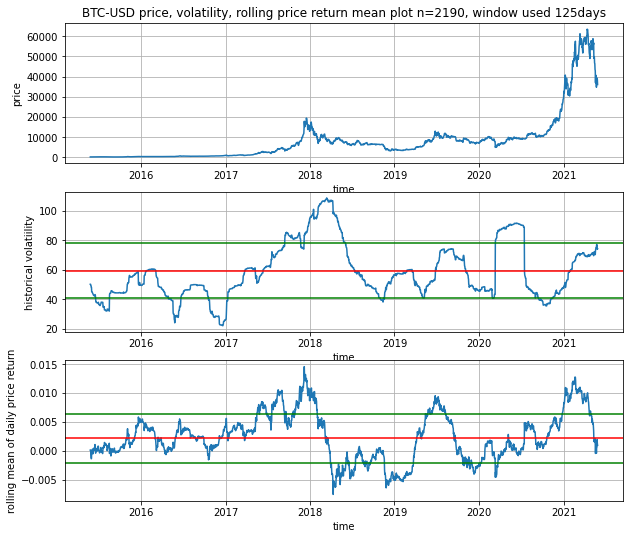

In [3]:
doit('BTC-USD',lookback=-365*6)

mean of hist_volatility 17.22473
mean of rolling mean 0.00034
(mean(red)+/-1SD(green)


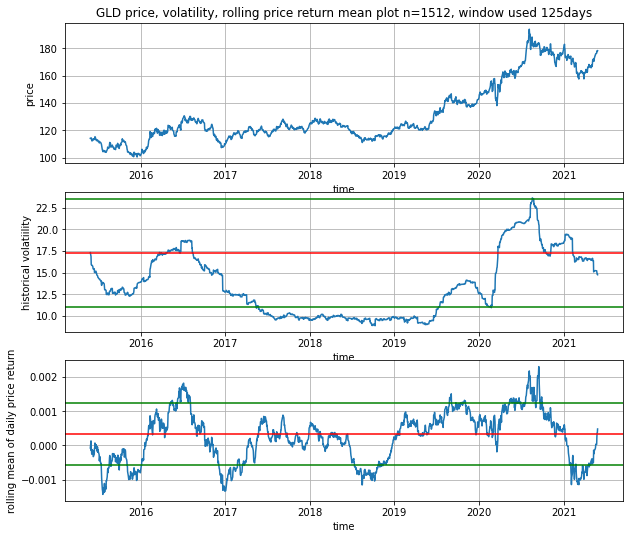

In [4]:
doit('GLD',lookback=-252*6)